In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import h5py
import itertools
import tqdm
from pykml import parser
import shapely

/tmp/ipykernel_6859/301498532.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


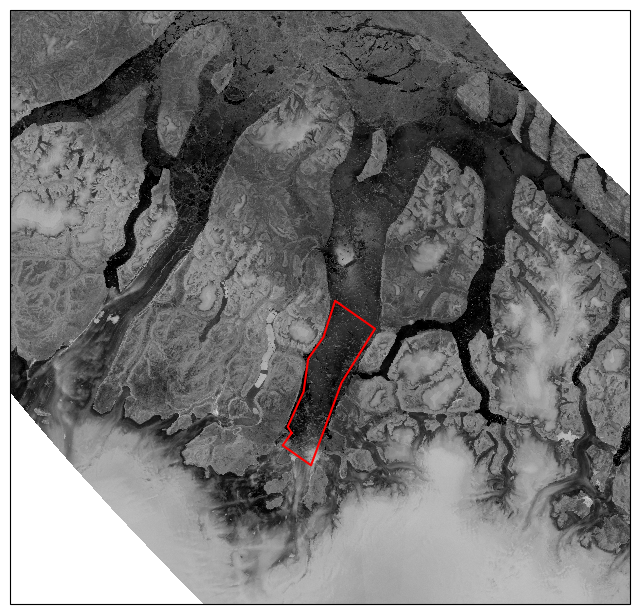

In [2]:
img_dir = './Browser_images'
file = '2024-01-01-00:00_2024-01-01-23:59_Sentinel-1_DH_HH_-_decibel_gamma0.tiff'
xds = xarray.open_dataset(f'{img_dir}/{file}',engine="rasterio")

basemap = np.array(xds.to_array())[0,0]

gt_lon = np.array(xds.x)
gt_lat = np.array(xds.y)
longrid = np.repeat(gt_lon[np.newaxis,:],len(gt_lat),axis=0)
latgrid = np.repeat(gt_lat[:,np.newaxis],len(gt_lon),axis=1)

# This requires wrangle_polygon.ipynb to run first

dfpoly = pd.read_csv('fjord_poly_coords.csv')

polylons = np.array(dfpoly['lons'])
polylats = np.array(dfpoly['lats'])

poly_coords = [(x,y) for x,y in zip(dfpoly['x'],
                                    dfpoly['y'])]
polygon = shapely.Polygon(poly_coords)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())


ax.set_extent([-45,-50,83,81], ccrs.PlateCarree())

ax.pcolormesh(longrid,latgrid,basemap,
             transform=ccrs.PlateCarree(),zorder=2,cmap='grey')

plt.plot(polylons,
         polylats,transform=ccrs.PlateCarree(),zorder=3,color='r')

plt.show()

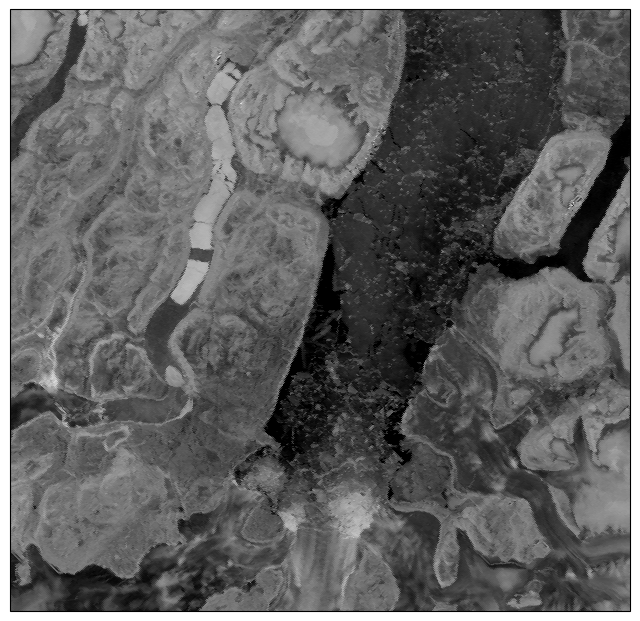

In [4]:
img_dir = './Browser_images'
file = '2024-01-01-00:00_2024-01-01-23:59_Sentinel-1_DH_HH_-_decibel_gamma0.tiff'
xds = xarray.open_dataset(f'{img_dir}/{file}',engine="rasterio")

basemap = np.array(xds.to_array())[0,0]

gt_lon = np.array(xds.x)
gt_lat = np.array(xds.y)
longrid = np.repeat(gt_lon[np.newaxis,:],len(gt_lat),axis=0)
latgrid = np.repeat(gt_lat[:,np.newaxis],len(gt_lon),axis=1)

# This requires wrangle_polygon.ipynb to run first

dfpoly = pd.read_csv('fjord_poly_coords.csv')

polylons = np.array(dfpoly['lons'])
polylats = np.array(dfpoly['lats'])

poly_coords = [(x,y) for x,y in zip(dfpoly['x'],
                                    dfpoly['y'])]
polygon = shapely.Polygon(poly_coords)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())


ax.set_extent([-45.8,-47,82.1,81.4], ccrs.PlateCarree())

ax.pcolormesh(longrid,latgrid,basemap,
             transform=ccrs.PlateCarree(),zorder=2,cmap='grey')

# plt.plot(polylons,
#          polylats,transform=ccrs.PlateCarree(),zorder=3,color='r')

plt.show()